# Análisis Exploratorio de Datos
En este reporte, se llevará a cabo una exploración detallada de los conjuntos de datos asociados con los conjuntos de hechos y víctimas. La meta principal consiste en comprender la organización de estos datos, detectar posibles patrones, y recopilar información significativa que pueda servir como guía para realizar el dashboard en PowerBI.

### Importación de bibliotecas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Desactivar los warnings
warnings.filterwarnings("ignore")

### Lectura de datos

In [58]:
hechos= pd.read_csv('../Datasets/CSV/hechos.csv')
victimas= pd.read_csv('../Datasets/CSV/victimas.csv')

### Estructura de los Dataframes

Visualizamos las primeras filas de los DataFrames

In [59]:
hechos.head()

,id_hecho,n_victimas,fecha,hh,tipo_calle,comuna,longitud,latitud,victima,acusado,vehiculo1,vehiculo2,gravedad
0,2016-0001,1,2016-01-01 00:00:00,4.0,avenida,8.0,-58.475340,-34.687570,moto,auto,moto,auto,fatal
1,2016-0002,1,2016-01-02 00:00:00,1.0,autopista,9.0,-58.508775,-34.669777,auto,pasajeros,auto,pasajeros,fatal
2,2016-0003,1,2016-01-03 00:00:00,7.0,avenida,1.0,-58.390403,-34.631894,moto,auto,moto,auto,fatal
3,2016-0004,1,2016-01-10 00:00:00,0.0,avenida,8.0,-58.465039,-34.680930,moto,NaN,moto,NaN,fatal
4,2016-0005,1,2016-01-21 00:00:00,5.0,avenida,1.0,-58.387183,-34.622466,moto,pasajeros,moto,pasajeros,fatal


In [60]:
victimas.head()

,id_hecho,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,gravedad
0,2016-0001,2016-01-01,conductor,moto,masculino,19.0,fatal
1,2016-0002,2016-01-02,conductor,auto,masculino,70.0,fatal
2,2016-0003,2016-01-03,conductor,moto,masculino,30.0,fatal
3,2016-0004,2016-01-10,conductor,moto,masculino,18.0,fatal
4,2016-0005,2016-01-21,conductor,moto,masculino,29.0,fatal


#### Tipos de datos

In [61]:
print("\nTipos de datos:")
hechos.dtypes # Muestra los tipos de datos de cada columna


Tipos de datos:


id_hecho       object
n_victimas      int64
fecha          object
hh            float64
tipo_calle     object
comuna        float64
longitud      float64
latitud       float64
victima        object
acusado        object
vehiculo1      object
vehiculo2      object
gravedad       object
dtype: object

In [62]:
print("\nTipos de datos:")
print(victimas.dtypes)  # Muestra los tipos de datos de cada columna


Tipos de datos:
id_hecho             object
fecha                object
rol                  object
vehiculo_victima     object
sexo_victima         object
edad_victima        float64
gravedad             object
dtype: object


### Valores nulos

In [63]:
print("\nPorcentaje de valores nulos en 'hechos':")
porcentaje_nulos_hechos = (hechos.isnull().sum() / hechos.shape[0]) * 100
print(round(porcentaje_nulos_hechos, 2).astype(str) + ' %') # Muestra la cantidad de valores nulos por columna


Porcentaje de valores nulos en 'hechos':
id_hecho        0.0 %
n_victimas      0.0 %
fecha           0.0 %
hh             0.04 %
tipo_calle    45.12 %
comuna         5.96 %
longitud       6.06 %
latitud        6.06 %
victima       43.88 %
acusado       62.54 %
vehiculo1     43.88 %
vehiculo2     62.61 %
gravedad        0.0 %
dtype: object


Las columnas tipo_calle, victima, acusado, vehiculo1 y vehiculo2 contienen una cantidad significativa de valores nulos. No obstante, al focalizarnos únicamente en los eventos catalogados con gravedad fatal, se evidenció una reducción considerable en la proporción de valores nulos en estas columnas.

In [64]:
print("\nPorcentaje de valores nulos en 'hechos' de gravedad fatal:")
porcentaje_nulos_hechos = (hechos.loc[hechos['gravedad']=='fatal'].isnull().sum() /hechos.loc[hechos['gravedad']=='fatal'].shape[0]) * 100
print(round(porcentaje_nulos_hechos, 2).astype(str) + ' %') # Muestra la cantidad de valores nulos por columna


Porcentaje de valores nulos en 'hechos' de gravedad fatal:
id_hecho       0.0 %
n_victimas     0.0 %
fecha          0.0 %
hh            0.14 %
tipo_calle    0.29 %
comuna        0.57 %
longitud       2.0 %
latitud        2.0 %
victima       1.29 %
acusado       3.29 %
vehiculo1     1.29 %
vehiculo2     5.72 %
gravedad       0.0 %
dtype: object


In [65]:
print("\nPorcentaje de valores nulos en 'hechos':")
porcentaje_nulos_victimas = (victimas.isnull().sum() / victimas.shape[0]) * 100
print(round(porcentaje_nulos_victimas, 2).astype(str) + ' %') # Muestra la cantidad de valores nulos por columna


Porcentaje de valores nulos en 'hechos':
id_hecho              0.0 %
fecha                 0.0 %
rol                 97.51 %
vehiculo_victima    57.49 %
sexo_victima         7.89 %
edad_victima        15.97 %
gravedad              0.0 %
dtype: object


Se observa que las columnas rol, vehiculo_victima y edad_victima presentan una proporción significativa de valores nulos en el conjunto de datos general. No obstante, si se restringe el  análisis a los accidentes catalogados con gravedad fatal, estas tasas de valores nulos experimentan una notable reducción.

In [66]:
print("\nPorcentaje de valores nulos en 'victimas' de gravedad fatal:")
porcentaje_nulos_victimas = (victimas.loc[victimas['gravedad']=='fatal'].isnull().sum() /victimas.loc[victimas['gravedad']=='fatal'].shape[0]) * 100
print(round(porcentaje_nulos_victimas, 2).astype(str) + ' %') # Muestra la cantidad de valores nulos por columna


Porcentaje de valores nulos en 'victimas' de gravedad fatal:
id_hecho             0.0 %
fecha                0.0 %
rol                 1.53 %
vehiculo_victima    1.26 %
sexo_victima        0.84 %
edad_victima        7.39 %
gravedad             0.0 %
dtype: object


#### Cantidad de filas y columnas

In [67]:
# Cantidad de filas y columnas en el dataframe 'hechos'
print("Cantidad de filas y columnas en el dataframe 'hechos':", hechos.shape)

# Cantidad de filas y columnas en el dataframe 'victimas'
print("Cantidad de filas y columnas en el dataframe 'victimas':", victimas.shape)

Cantidad de filas y columnas en el dataframe 'hechos': (24481, 13)
Cantidad de filas y columnas en el dataframe 'victimas': (28322, 7)


#### Filas de duplicadas

In [68]:
# Verificar y mostrar la cantidad de duplicados en el dataframe 'hechos'
duplicados_hechos = hechos.duplicated().sum()
print("Cantidad de duplicados en el dataframe 'hechos':", duplicados_hechos)

# Verificar y mostrar la cantidad de duplicados en el dataframe 'victimas'
duplicados_victimas = victimas.duplicated().sum()
print("Cantidad de duplicados en el dataframe 'victimas':", duplicados_victimas)

Cantidad de duplicados en el dataframe 'hechos': 0
Cantidad de duplicados en el dataframe 'victimas': 633


Observamos que en el dataframe 'victimas' existen 633 filas duplicadas. Para discernir si estos duplicados representan datos idénticos o si se refieren a individuos con características similares involucrados en un mismo accidente, tomaremos uno de los identificadores (id) asociados con estos datos duplicados para una inspección más detallada.

In [69]:
id_hecho_especifico = 'LC-2019-0008238'
filas = victimas[victimas['id_hecho'] == id_hecho_especifico]

# Imprimir las filas duplicadas específicas
print(f"Filas duplicadas en el dataframe 'victimas' para id_hecho '{id_hecho_especifico}':")
filas

Filas duplicadas en el dataframe 'victimas' para id_hecho 'LC-2019-0008238':


,id_hecho,fecha,rol,vehiculo_victima,sexo_victima,edad_victima,gravedad
811,LC-2019-0008238,2019-01-04,NaN,NaN,femenino,69.0,leve
812,LC-2019-0008238,2019-01-04,NaN,NaN,femenino,69.0,leve


In [70]:
hechos[hechos['id_hecho']=='LC-2019-0008238']

,id_hecho,n_victimas,fecha,hh,tipo_calle,comuna,longitud,latitud,victima,acusado,vehiculo1,vehiculo2,gravedad
774,LC-2019-0008238,2,2019-01-04 00:00:00,19.0,NaN,15.0,-58.479158,-34.590782,NaN,NaN,NaN,NaN,leve


La suma de la columna 'n_victimas' en el dataframe 'hechos' difiere solo en 1 con respecto al número total de filas en el dataframe 'victimas'. Este hallazgo nos conduce la conclusión: no estamos frente a datos duplicados, sino más bien ante la representación de individuos distintos que comparten similitudes en edad y sexo, y que estuvieron involucrados en el mismo accidente.

In [71]:
# Sumar la columna 'n_victimas'
total_victimas = hechos['n_victimas'].sum()

# Imprimir el resultado
print(f"El total de víctimas en el dataframe 'hechos' es: {total_victimas}")

El total de víctimas en el dataframe 'hechos' es: 28321


Al seleccionar un identificador específico que contiene datos duplicados, notamos que en el campo 'hecho' se indica que dos personas sufrieron daños en el accidente. Este hallazgo sugiere que no estamos tratando con valores duplicados, sino más bien con dos personas distintas que comparten características similares, como el sexo y la edad, y que estuvieron involucradas en el mismo incidente.

## Estadística descriptiva

In [72]:
hechos.drop(columns=['comuna','longitud','latitud']).describe()

,n_victimas,hh
count,24481.000000,24471.000000
mean,1.156856,13.555556
std,0.544944,5.596032
min,0.000000,0.000000
25%,1.000000,10.000000
50%,1.000000,14.000000
75%,1.000000,18.000000
max,16.000000,23.000000


Para la columna 'n_victimas', se observan un total de 24,481 registros válidos. La cantidad promedio de víctimas por accidente es de aproximadamente 1.16, con una desviación estándar de 0.54, indicando una variabilidad moderada alrededor de la media. La cantidad de víctimas varía desde un mínimo de 0 hasta un máximo de 16, con un 75% de los accidentes reportando una sola víctima.

En cuanto a la columna 'hh', se dispone de 24,471 registros. La hora promedio en la que ocurren los accidentes es aproximadamente a las 13:00 . La desviación estándar de 5.60 sugiere cierta variabilidad en las horas de los accidentes. El rango de horas abarca desde las 0:00 hasta las 23:00, con el 25% de los accidentes ocurriendo antes de las 10:00 y el 75% antes de las 18:00.

In [73]:
hechos[hechos['gravedad'] == 'fatal'].drop(columns=['comuna', 'longitud', 'latitud']).describe()

,n_victimas,hh
count,699.000000,698.000000
mean,1.032904,11.651862
std,0.193901,6.692723
min,1.000000,0.000000
25%,1.000000,6.000000
50%,1.000000,11.000000
75%,1.000000,17.000000
max,3.000000,23.000000


Para los accidentes catalogados como fatales en el dataframe 'hechos', se dispone de 699 registros válidos. En promedio, estos accidentes involucran aproximadamente 1.03 víctimas, con una desviación estándar de 0.19, indicando una variabilidad baja en la cantidad de víctimas por incidente.

En relación con la hora de los accidentes fatales, la media es aproximadamente a las 11:00 . La desviación estándar de 6.69 sugiere cierta variabilidad en las horas de estos eventos. El rango de horas abarca desde las 0:00 hasta las 23:00, con el 25% de los accidentes fatales ocurriendo antes de las 6:00 y el 75% antes de las 17:00.

In [74]:
victimas.describe()

,edad_victima
count,23798.000000
mean,37.851122
std,15.379793
min,0.000000
25%,27.000000
50%,35.000000
75%,46.000000
max,100.000000


La columna 'edad_victima' en el dataframe 'victimas' cuenta con 23,798 registros válidos. La edad promedio de las víctimas en accidentes es de aproximadamente 37.85 años, con una desviación estándar de 15.38, indicando una variabilidad moderada alrededor de la media.

En términos de distribución, la edad mínima registrada es de 0 años. El primer cuartil (25%) muestra que el 25% de las víctimas tienen 27 años o menos, mientras que el segundo cuartil (50%) indica que la mitad de las víctimas tienen 35 años o menos. El tercer cuartil (75%) revela que el 75% de las víctimas tienen 46 años o menos. La edad máxima registrada es de 100 años.

In [75]:
victimas[victimas['gravedad']=='fatal'].describe()

,edad_victima
count,664.000000
mean,42.167169
std,19.788034
min,1.000000
25%,27.000000
50%,37.000000
75%,56.250000
max,95.000000


Las edades de víctimas fatales, con un total de 664 registros. La edad promedio de estas víctimas es de aproximadamente 42.17 años, con una desviación estándar de alrededor de 19.79 años, lo que indica cierta variabilidad en las edades.

La edad más joven registrada es de 1 año, mientras que el 25% de las víctimas tienen 27 años o menos. La mediana, que representa el punto medio de las edades, es de 37 años, lo que significa que el 50% de las víctimas tienen esta edad o menos. El 75% de las edades son 56.25 años o menos, y la edad máxima registrada es de 95 años.

## Histogramas

Visualizar la distribución de las edades de las víctimas, dividiendo la representación en dos filas distintas. En la primera fila, presentamos la distribución de edades considerando todos los datos disponibles. En la segunda fila, nos enfocamos exclusivamente en los accidentes fatales.

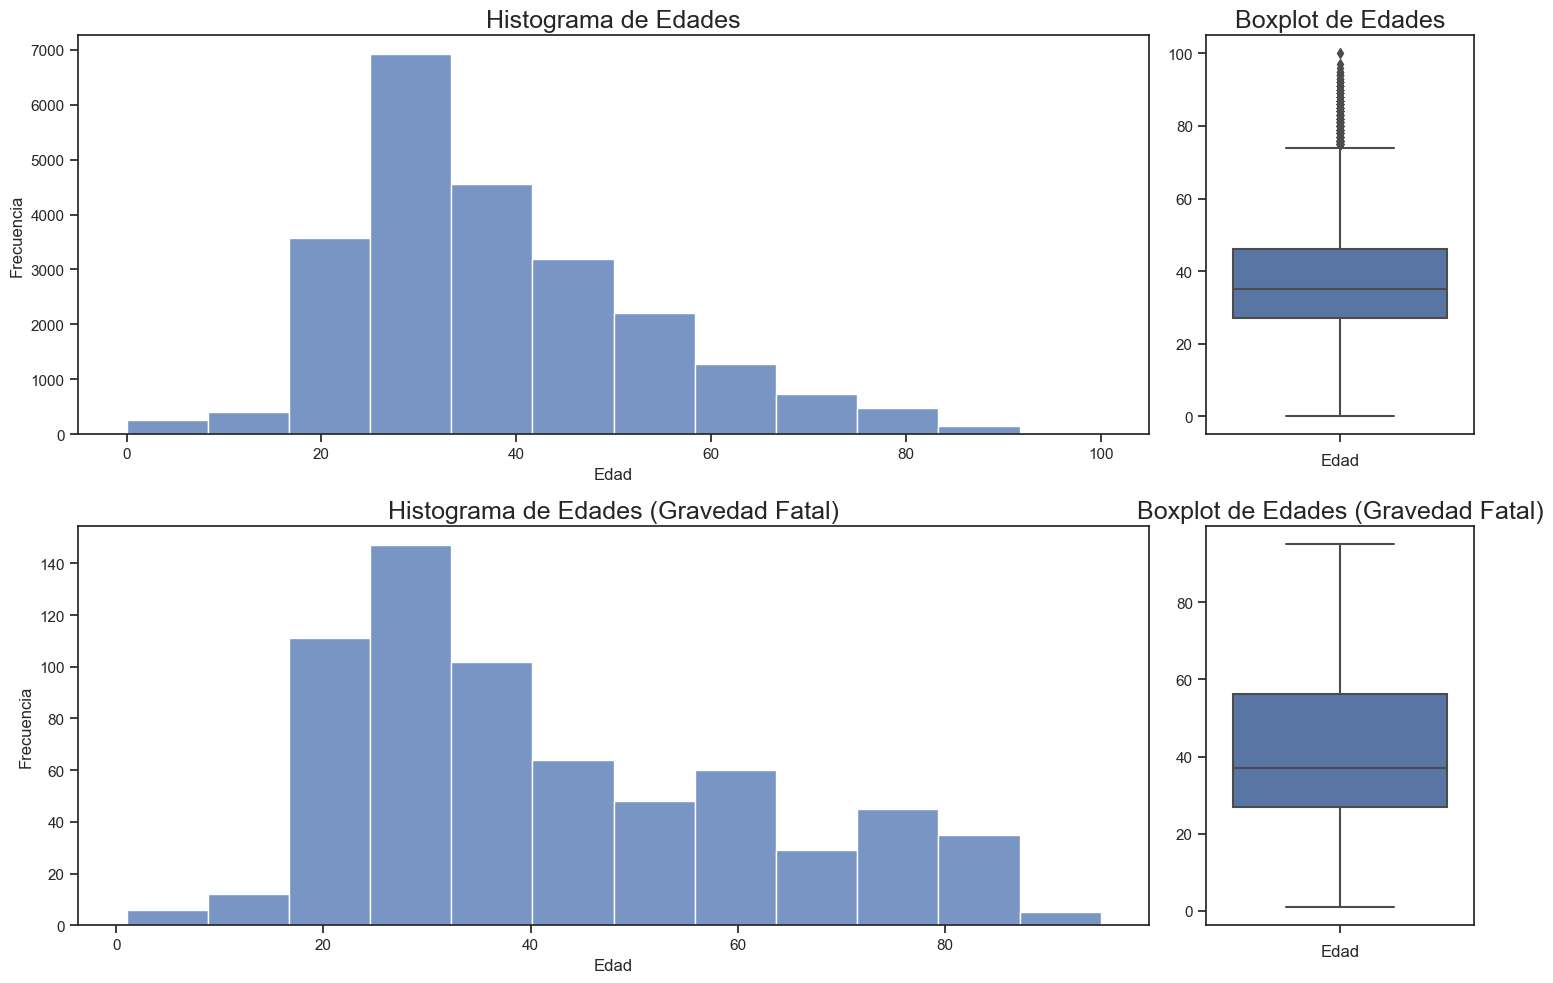

In [76]:

# Crear subconjuntos de datos
todos_los_datos = victimas
gravedad_fatal = victimas[victimas['gravedad'] == 'fatal']

# Configurar estilo
sns.set(style="ticks")


# Crear subgráficos 2x2 con anchos relativos
fig, axs = plt.subplots(2, 2, figsize=(15, 10), gridspec_kw={'width_ratios': [8, 2]})

# Histograma de todas las edades
sns.histplot(data=todos_los_datos, x='edad_victima', ax=axs[0, 0],bins= 12)
axs[0, 0].set_title('Histograma de Edades',fontsize=18)
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')

# Boxplot de todas las edades (vertical)
sns.boxplot(data=todos_los_datos, y='edad_victima', ax=axs[0, 1])
axs[0, 1].set_title('Boxplot de Edades',fontsize=18)
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('')

# Histograma de edades con gravedad fatal
sns.histplot(data=gravedad_fatal, x='edad_victima', ax=axs[1, 0],bins= 12)
axs[1, 0].set_title('Histograma de Edades (Gravedad Fatal)',fontsize=18)
axs[1, 0].set_xlabel('Edad')
axs[1, 0].set_ylabel('Frecuencia')

# Boxplot de edades con gravedad fatal (vertical)
sns.boxplot(data=gravedad_fatal, y='edad_victima', ax=axs[1, 1])
axs[1, 1].set_title('Boxplot de Edades (Gravedad Fatal)',fontsize=18)
axs[1, 1].set_xlabel('Edad')
axs[1, 1].set_ylabel('')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Al analizar los histogramas de las edades en accidentes fatales y no fatales, notamos una notable similitud en sus distribuciones. Sin embargo, al examinar el boxplot que abarca todos los datos, identificamos la presencia de valores extremos, los cuales no están presentes en los accidentes de gravedad fatal. Las medianas en ambos casos son parecidas, indicando una tendencia central similar. Sin embargo, se destaca que el rango intercuartílico de los accidentes fatales es más amplio en comparación con los no fatales, sugiriendo una mayor variabilidad en las edades de las víctimas en situaciones de gravedad fatal.

Además, hay que destacar que la cantidad de datos relacionados con accidentes no fatales es significativamente mayor que la cantidad de accidentes fatales. 

### Gráfico de Barras

#### Gráfico de Barras de Tipo de Calle
Exploramos la frecuencia en la que ocurren los accidentes dependiendo del tipo de calle.

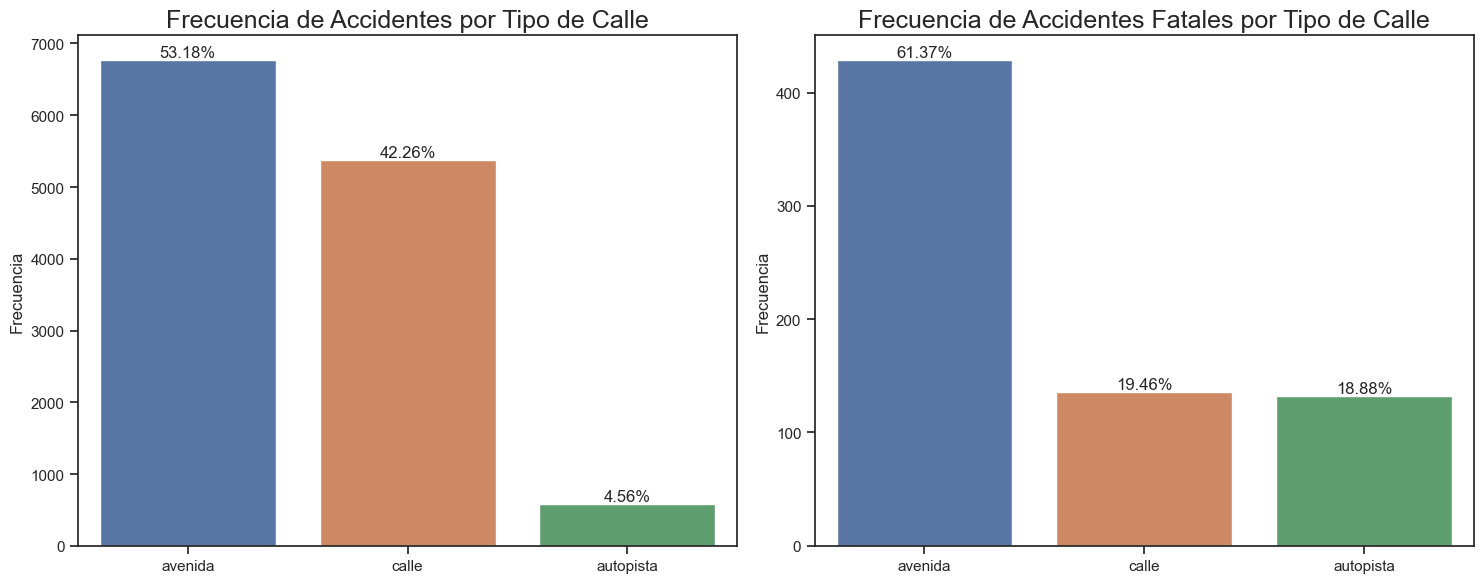

In [77]:
# Configurar estilo
sns.set(style="ticks")

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico de barras para los accidentes no fatal, ordenado de mayor a menor
sns.countplot(x='tipo_calle', data=hechos[hechos['gravedad'] != 'fatal'], order=hechos['tipo_calle'].value_counts().index, ax=axs[0])
axs[0].set_title('Frecuencia de Accidentes por Tipo de Calle', fontsize=18)
axs[0].set_xlabel('')
axs[0].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra en el primer gráfico
total_todos = len(hechos[hechos['gravedad'] != 'fatal'].dropna(subset=['tipo_calle']))
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_todos:.2%}', ha="center", va="bottom", fontsize=12)  # Aumentar el tamaño de la fuente

# Gráfico de barras filtrando por gravedad fatal y ordenado de mayor a menor
sns.countplot(x='tipo_calle', data=hechos[hechos['gravedad'] == 'fatal'], order=hechos['tipo_calle'].value_counts().index, ax=axs[1])

# Agregar etiquetas de porcentaje en cada barra en el segundo gráfico
total_fatal = len(hechos[hechos['gravedad'] == 'fatal'])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_fatal:.2%}', ha="center", va="bottom", fontsize=12)  # Aumentar el tamaño de la fuente

axs[1].set_title('Frecuencia de Accidentes Fatales por Tipo de Calle', fontsize=18)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()



La mayoría de accidentes, tanto fatales como no fatales, ocurre mayormente en avenidas, seguido por calles y autopistas en menor medida. En los accidentes fatales, las avenidas destacan significativamente, representando el 61% de los casos. Las proporciones entre avenidas y autopistas son casi equivalentes en este contexto. En contraste, en los accidentes no fatales, las avenidas aún mantienen la mayoría, con aproximadamente el 53.18%, seguidas por calles con un 42.26% y autopistas con un 4.56%.

#### Gráfico de Barras por Género de la Víctima

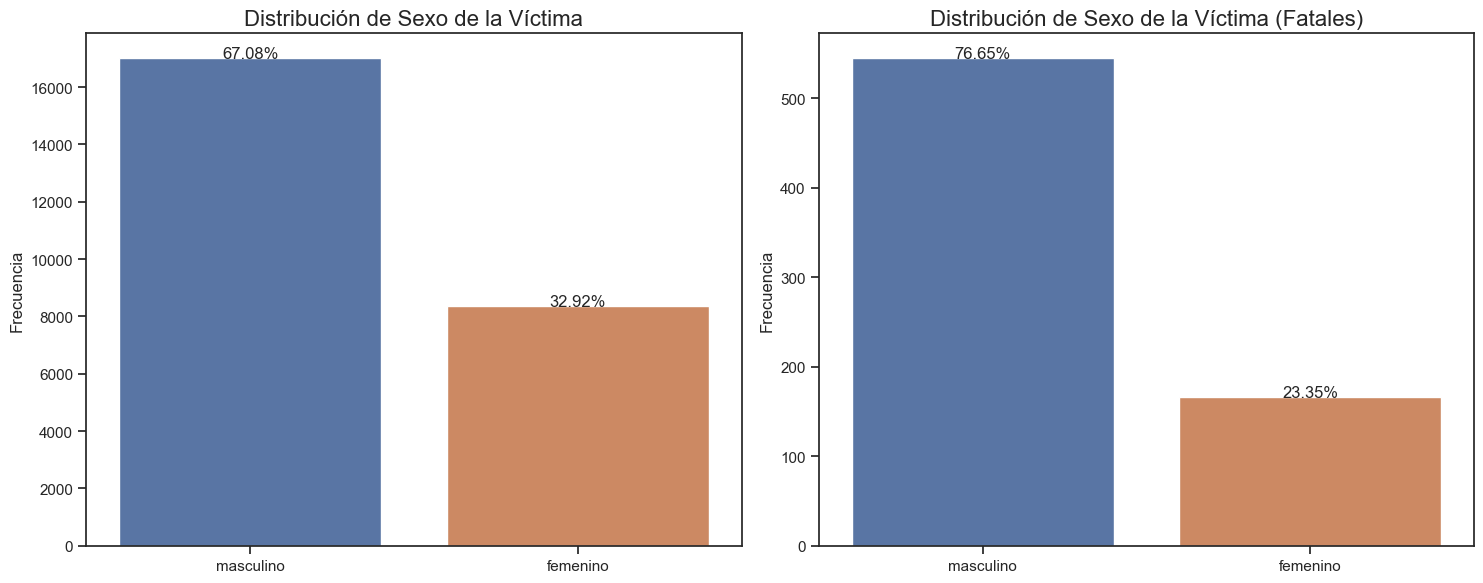

In [78]:
# Configurar estilo
sns.set(style="ticks")

# Crear subgráficos
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Subplot para todos los datos
sns.countplot(x='sexo_victima', data= victimas[victimas['gravedad'] != 'fatal'].dropna(subset=['sexo_victima']), ax=axs[0])
axs[0].set_title('Distribución de Sexo de la Víctima',fontsize=16)
axs[0].set_xlabel('')
axs[0].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra (primer subplot)
total_data = len(victimas[victimas['gravedad'] != 'fatal'].dropna(subset=['sexo_victima']))
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total_data:.2%}', ha="center")

# Subplot solo para datos de gravedad fatal
sns.countplot(x='sexo_victima', data=victimas[victimas['gravedad'] == 'fatal'].dropna(subset=['sexo_victima']), ax=axs[1])
axs[1].set_title('Distribución de Sexo de la Víctima (Fatales)',fontsize= 16)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra (segundo subplot)
total_fatal = len(victimas[victimas['gravedad'] == 'fatal'].dropna(subset=['sexo_victima']))
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total_fatal:.2%}', ha="center")

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()



La mayoría de las víctimas, ya sea en accidentes no fatales o fatales, son del género masculino.

#### Gráfico de barras de roles en accidentes fatales

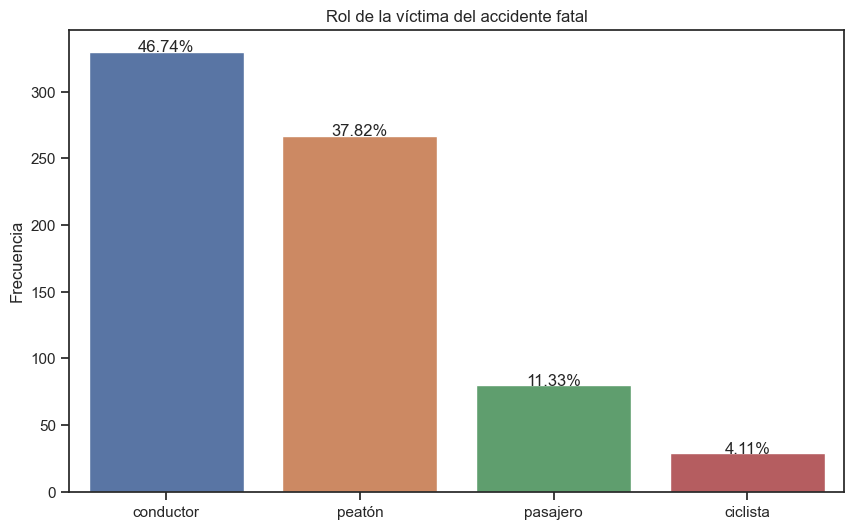

In [79]:
# Configurar estilo
sns.set(style="ticks")

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.countplot(x='rol', data=victimas[victimas['gravedad'] == 'fatal'].dropna(subset=['rol']), order=victimas[victimas['gravedad'] == 'fatal']['rol'].value_counts().index)

# Agregar etiquetas de porcentaje en cada barra
total_fatal = len(victimas[victimas['gravedad'] == 'fatal'].dropna(subset=['rol']))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 0.1, f'{height/total_fatal:.2%}', ha="center")

plt.title('Rol de la víctima del accidente fatal')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

Cuando analizamos el rol que desempeñaba la persona víctima del accidente fatal, observamos que en el 46.74% de los casos era el conductor, en el 37.82% era el peatón, en el 11.33% era el pasajero y en el 4.11% de los casos era el ciclista.

#### Gráfico de Barras de accidentes por comuna

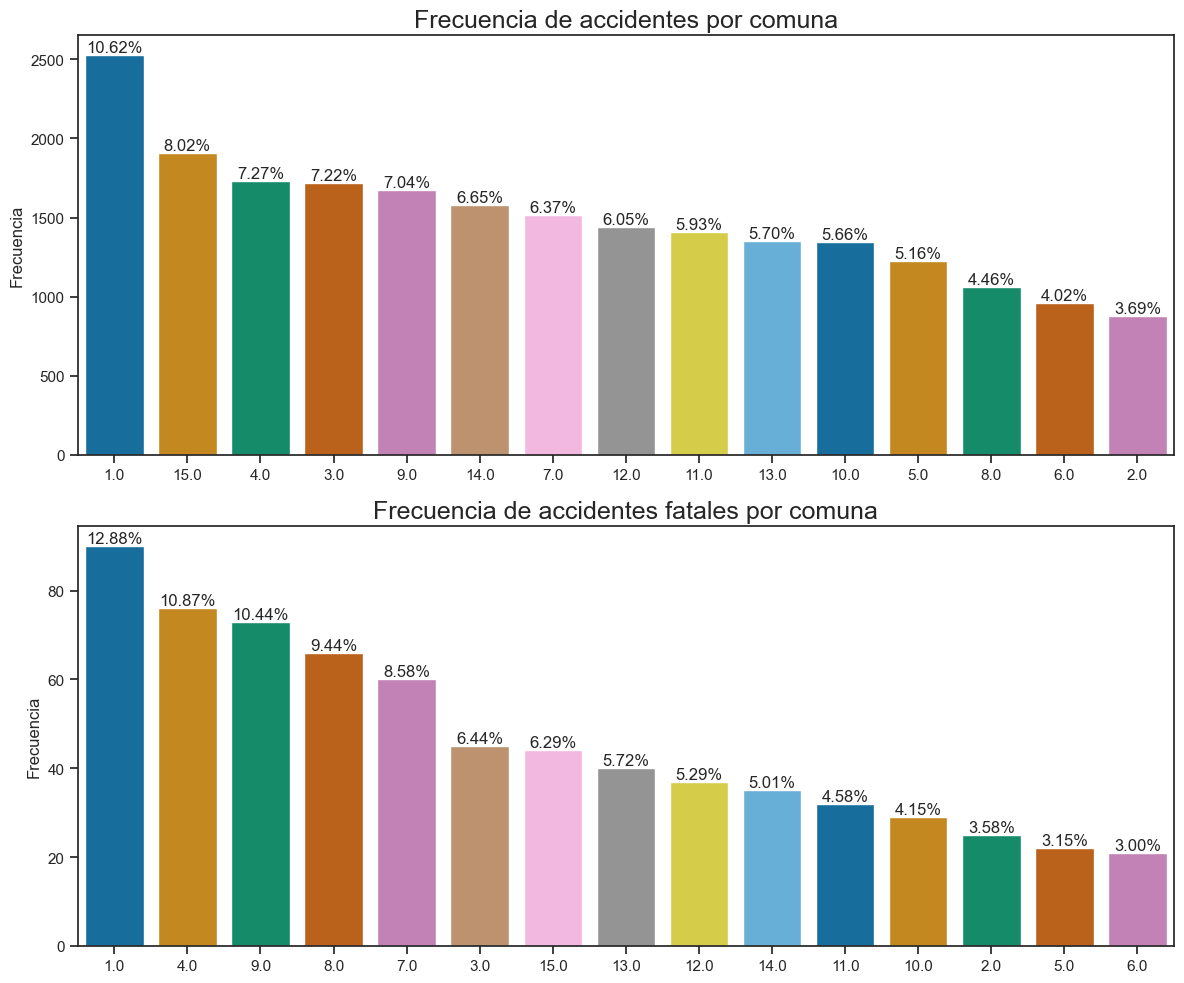

In [80]:
# Configurar estilo
sns.set(style="ticks")

# Crear subgráficos
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Gráfico de barras para gravedad distinta de "fatal"
sns.countplot(x='comuna', data=hechos[hechos['gravedad'] != 'fatal'], order=hechos['comuna'].value_counts().index, ax=axs[0] ,palette='colorblind')
axs[0].set_title('Frecuencia de accidentes por comuna',fontsize=18)
axs[0].set_xlabel('') 
axs[0].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra en el primer gráfico
total_todos = len(hechos[hechos['gravedad'] != 'fatal'])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_todos:.2%}', ha="center", va="bottom", fontsize=12) 

# Gráfico de barras para gravedad "fatal"
sns.countplot(x='comuna', data=hechos[hechos['gravedad'] == 'fatal'], order=hechos[hechos['gravedad'] == 'fatal']['comuna'].value_counts().index, ax=axs[1], palette='colorblind') 
axs[1].set_title('Frecuencia de accidentes fatales por comuna',fontsize=18)
axs[1].set_xlabel('')
axs[1].set_ylabel('Frecuencia')

# Agregar etiquetas de porcentaje en cada barra en el segundo gráfico
total_fatal = len(hechos[hechos['gravedad'] == 'fatal'])
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.01, f'{height/total_fatal:.2%}', ha="center", va="bottom", fontsize=12) 

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()



En el gráfico de barras superior, que ilustra los accidentes no fatales por comuna, se evidencia que la mayoría de estos incidentes se concentran especialmente en las comunas 1, 15 y 4. Por otro lado, en la representación inferior, correspondiente a los accidentes fatales, se observa que las comunas más afectadas son la 1, 4 y 9

#### Gráfica de barras por vehículo de la víctima

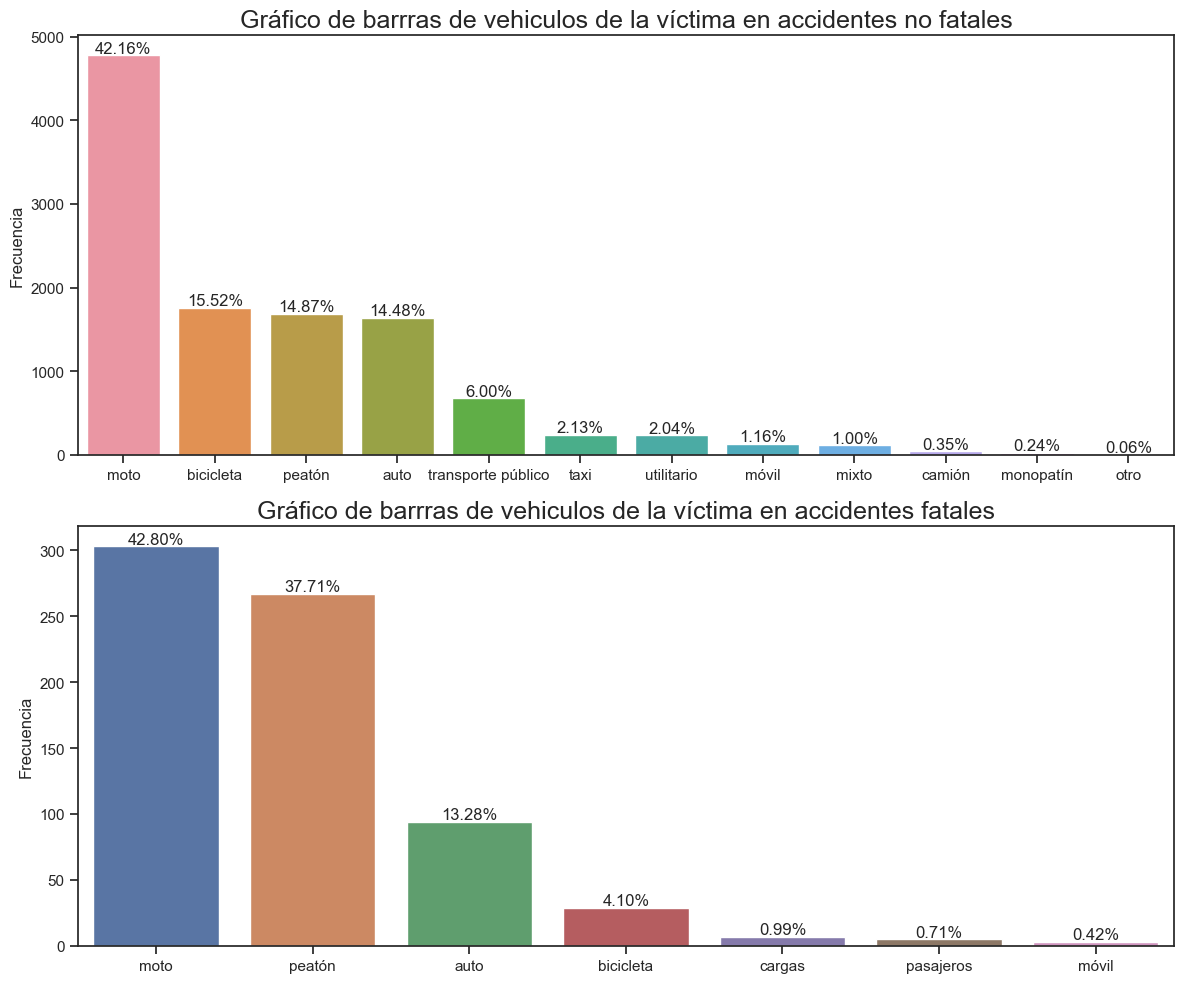

In [88]:
# Configurar estilo
sns.set(style="ticks")

# Crear dos subgráficos (2 filas, 1 columna)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Subgráfico 1: Gravedades diferentes de 'fatal'
order_no_fatal = victimas[victimas['gravedad'] != 'fatal']['vehiculo_victima'].value_counts().index
ax1 = sns.countplot(x='vehiculo_victima', data=victimas[victimas['gravedad'] != 'fatal'], ax=axes[0], order=order_no_fatal)
axes[0].set_title('Gráfico de barrras de vehiculos de la víctima en accidentes no fatales',fontsize=18)
axes[0].set_xlabel('')
axes[0].set_ylabel('Frecuencia')

# Añadir etiquetas de porcentaje al Subgráfico 1
total_no_fatal = len(victimas[victimas['gravedad'] != 'fatal'].dropna(subset=['vehiculo_victima']))
for p in ax1.patches:
    height = p.get_height()
    ax1.annotate(f'{height / total_no_fatal:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')  # Ajuste aquí

# Subgráfico 2: Gravedad 'fatal'
order_fatal = victimas[victimas['gravedad'] == 'fatal']['vehiculo_victima'].value_counts().index
ax2 = sns.countplot(x='vehiculo_victima', data=victimas[victimas['gravedad'] == 'fatal'], ax=axes[1], order=order_fatal)
axes[1].set_title('Gráfico de barrras de vehiculos de la víctima en accidentes fatales',fontsize=18)
axes[1].set_xlabel('')
axes[1].set_ylabel('Frecuencia')

# Añadir etiquetas de porcentaje al Subgráfico 2
total_fatal = len(victimas[victimas['gravedad'] == 'fatal'].dropna(subset=['vehiculo_victima']))
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height / total_fatal:.2%}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')  # Ajuste aquí

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

Gráfico de Barras de Frecuencia de Accidentes por Año

In [26]:
# Extraer el año de la columna 'fecha' en el dataframe 'hechos'
hechos['año'] = pd.to_datetime(hechos['fecha']).dt.year

# Crear gráfico de barras de frecuencia por año
plt.figure(figsize=(10, 6))
sns.countplot(x='año', data=hechos)
plt.title('Frecuencia de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.show()

ValueError: time data "5/17/2020" doesn't match format "%Y-%m-%d %H:%M:%S", at position 24480. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Gráfico de Barras de Frecuencia de Accidentes por Mes

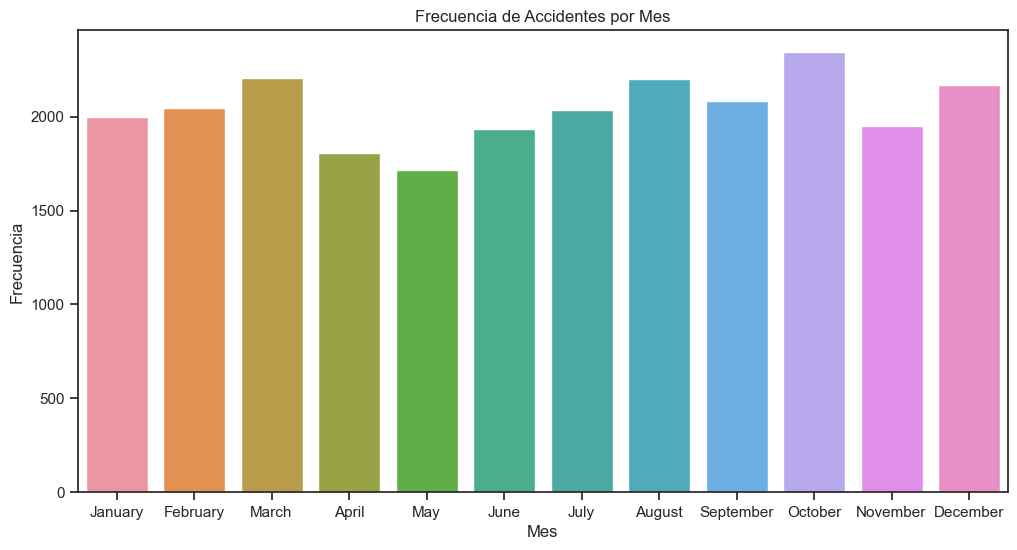

In [ ]:
# Extraer el mes de la columna 'fecha' en el dataframe 'hechos'
hechos['mes'] = pd.to_datetime(hechos['fecha']).dt.month_name()

# Crear gráfico de barras de frecuencia por mes
plt.figure(figsize=(12, 6))
sns.countplot(x='mes', data=hechos, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Frecuencia de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.show()

Gráfico de Barras de Frecuencia de Accidentes por Hora del Día

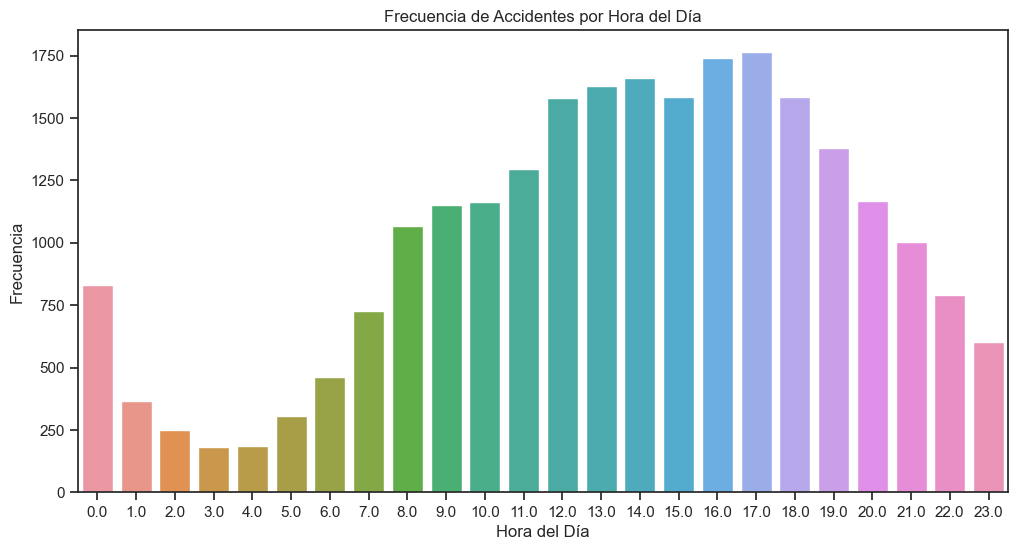

In [ ]:
# Crear gráfico de barras de frecuencia por hora del día
plt.figure(figsize=(12, 6))
sns.countplot(x='hh', data=hechos)
plt.title('Frecuencia de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Frecuencia')
plt.show()

Gráfico de Barras Apiladas de Combinaciones de Vehículos

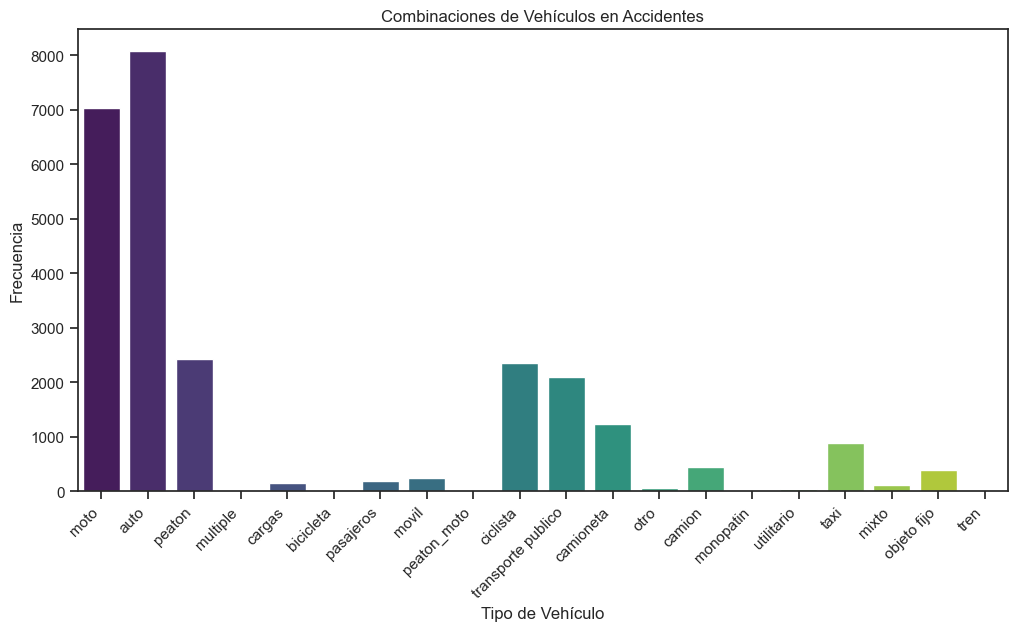

In [ ]:
# Unir ambos dataframes
df = pd.merge(hechos, victimas, on='id_hecho')

# Crear un nuevo dataframe con las combinaciones de vehículos
combinaciones_vehiculos = pd.concat([df['vehiculo1'], df['vehiculo2']])

# Crear gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sns.countplot(x=combinaciones_vehiculos, palette='viridis')
plt.title('Combinaciones de Vehículos en Accidentes')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

Gráfico de Barras de Frecuencia de Vehículos 1 y 2 por Separado

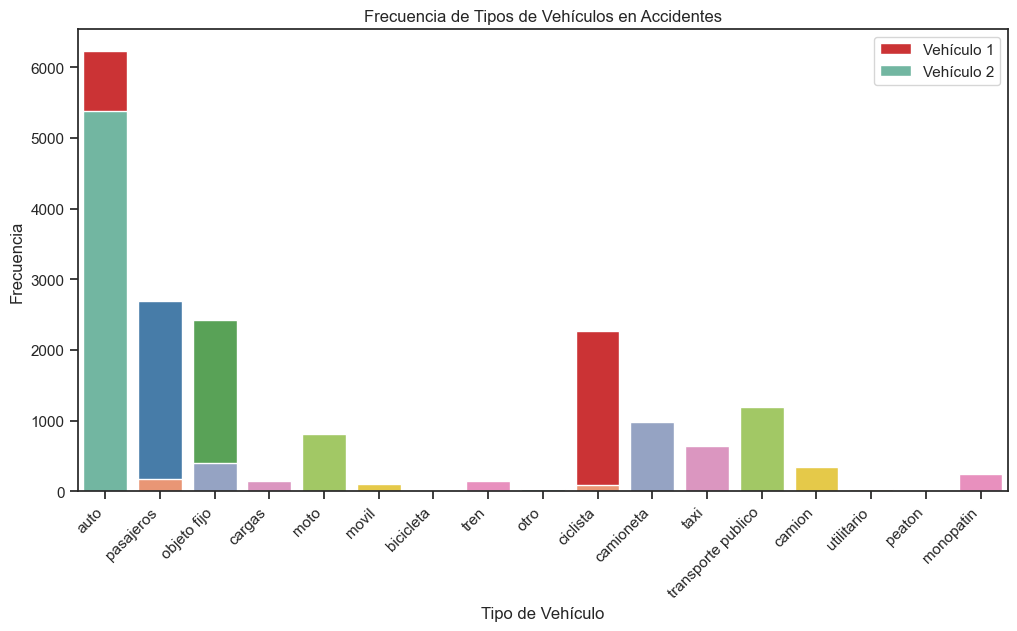

In [ ]:
# Crear gráfico de barras separadas para vehículo1 y vehículo2
plt.figure(figsize=(12, 6))
sns.countplot(x='vehiculo1', data=df, palette='Set1', label='Vehículo 1')
sns.countplot(x='vehiculo2', data=df, palette='Set2', label='Vehículo 2')
plt.title('Frecuencia de Tipos de Vehículos en Accidentes')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Frecuencia')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()




Exploración de relaciones entre variables mediante el cálculo de correlaciones.
Manejo de Valores Atípicos:

Identificación y manejo de valores atípicos que podrían afectar el análisis.
Exploración de Relaciones entre Variables:

Análisis de cómo las diferentes variables se relacionan entre sí.
Análisis de Tendencias y Patrones Temporales:

Si el conjunto de datos tiene una dimensión temporal, se deben explorar las tendencias y patrones a lo largo del tiempo.
Segmentación de Datos:

Segmentación de datos para comparar diferentes grupos y entender mejor las variaciones.
Conclusiones Preliminares:

Resumen de las observaciones clave y conclusiones preliminares derivadas del análisis exploratorio.